***Question 1***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [ ]:
#K means
def initialize_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def compute_distances(data, centroids):
    distances = np.sqrt(np.min(np.square(data[:, np.newaxis, :] - centroids[np.newaxis, :, :]), axis=2))
    return distances

def assign_clusters(distances):
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        centroids = update_centroids(data, clusters, k)
    return centroids, clusters

In [ ]:
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-means): ", wcss)

Total within-cluster sum of squares (K-means):  300.2400348413963


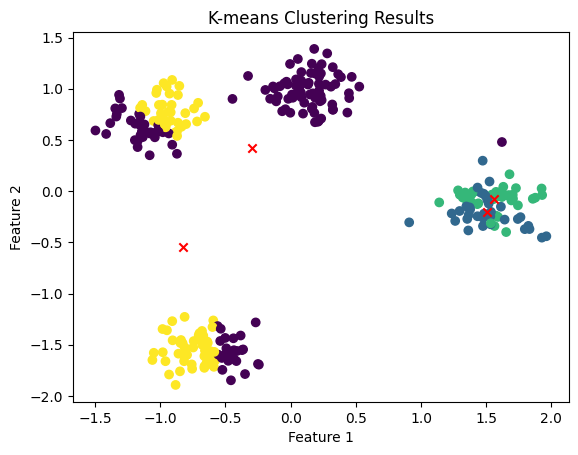

In [ ]:
# Visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [ ]:
#K medoids
def initialize_medoids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def compute_dissimilarities(data, medoids):
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0]))
    for i in range(medoids.shape[0]):
        dissimilarities[:, i] = np.linalg.norm(data - medoids[i], axis=1)
    return dissimilarities

def assign_clusters_medoids(dissimilarities):
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        medoids[i] = data[clusters == i][np.argmin(np.sum(np.linalg.norm(data[clusters == i] - data[clusters == i][:, np.newaxis], axis=2), axis=1))]
    return medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters_medoids(dissimilarities)
        medoids = update_medoids(data, clusters, k)
    return medoids, clusters

In [ ]:
k = 4
medoids, clusters = k_medoids(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-medoids): ", wcss)

Total within-cluster sum of squares (K-medoids):  17.692423284287024


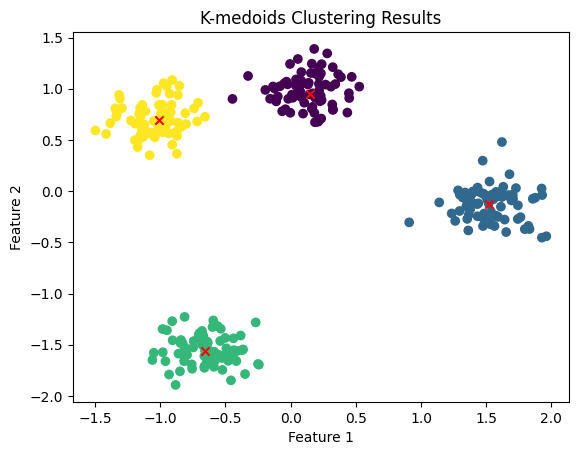

In [ ]:
# Visualize
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()